In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from IPython.display import clear_output
from src import spotify, dp, utils, DB

db = DB()

In [4]:
# 1. Get Token
token = spotify.get_token()

# 2. Select Music
sel_tracks = spotify.search_tracks(token)
mail_box_id = str(db.regist_mail_box(sel_tracks).inserted_id)

# 3. Data Processing
genres = spotify.get_genres(token, sel_tracks)
features = spotify.get_features(token, sel_tracks)
db.observe_seed_zone(features)

recos = spotify.get_recommend(sel_tracks, features, genres, token)
reco_features = spotify.get_features(token, recos)

계속하시려면 next, 종료는 exit를 입력해주세요.exit


### sel tracks (우체통)
- 사용자의 음악 성향

In [5]:
sel_tracks.head()

,id,name,artists,artists_name
0,4lpvCG7eNzHAXwvMxWUNjz,No Blueberries,2o8gT0fQmFxGNbowbdgeZe,DPR IAN
1,1dN4Z7wZTQXLEl33RkMO3a,Text Me,0siBQaURCli5wn2lqv8WZg,DPR LIVE
2,5FsdBmqWWfS6S5X4NfmxSh,Hula Hoops,0siBQaURCli5wn2lqv8WZg,DPR LIVE


In [6]:
features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,4lpvCG7eNzHAXwvMxWUNjz,0.721,0.617,4,-6.178,0.0386,0.507,0,0.252,0.902,148.032
1,1dN4Z7wZTQXLEl33RkMO3a,0.846,0.592,5,-6.452,0.2800,0.146,0,0.258,0.757,134.024
2,5FsdBmqWWfS6S5X4NfmxSh,0.758,0.852,3,-5.340,0.2530,0.214,0,0.112,0.665,109.868


### recos
- 사용자가 등록한 음악으로 Spotify API 에서 추천된 음악

In [7]:
recos.head()

,id,name,artists,artists_name
1,3vZvHyE5Vpjqxyh0TPOO73,In My Mood,7cEaNXXTHx3LokbjUUyHal,BIG Naughty
2,0lSJQip2wVidbu1JfZ4IEQ,BINU,6UbmqUEgjLA6jAcXwbM1Z9,BIBI
3,5IV28bUA0OxEtY1pMnQv4c,Another Sad Love Song,4oEXworvhegyK83rZwVyWL,GSoul
4,4OGE9JDSqSGrfi7AF158uG,Shy (eh o),1MAUqH0haKBYbjpknTfreY,PENOMECO
5,1Fhb9iJPufNMZSwupsXiRe,beside you,3pc0bOVB5whxmD50W79wwO,keshi


In [8]:
reco_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,3vZvHyE5Vpjqxyh0TPOO73,0.774,0.653,4,-5.686,0.0640,0.533,0.000000,0.1160,0.955,135.120
1,0lSJQip2wVidbu1JfZ4IEQ,0.842,0.522,4,-5.815,0.0329,0.719,0.000000,0.1910,0.641,119.045
2,5IV28bUA0OxEtY1pMnQv4c,0.625,0.477,4,-5.981,0.0363,0.633,0.000000,0.1390,0.239,136.242
3,4OGE9JDSqSGrfi7AF158uG,0.747,0.661,4,-6.523,0.0813,0.308,0.000016,0.0768,0.905,97.984
4,1Fhb9iJPufNMZSwupsXiRe,0.711,0.747,0,-6.335,0.0523,0.459,0.000000,0.0957,0.852,136.000


### norm data
- 정규화

In [9]:
norm_features = dp.make_norm(features, reco_features)

norm_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,4lpvCG7eNzHAXwvMxWUNjz,0.641921,0.477966,0.363636,0.555055,0.026305,0.652383,0.0,0.305096,0.931765,0.592341
1,1dN4Z7wZTQXLEl33RkMO3a,0.823872,0.435593,0.454545,0.519810,0.530271,0.187607,0.0,0.313038,0.761176,0.481737
2,5FsdBmqWWfS6S5X4NfmxSh,0.695779,0.876271,0.272727,0.662851,0.473904,0.275155,0.0,0.119788,0.652941,0.291007
3,3vZvHyE5Vpjqxyh0TPOO73,0.719068,0.538983,0.363636,0.618343,0.079332,0.685858,0.0,0.125083,0.994118,0.490391
4,0lSJQip2wVidbu1JfZ4IEQ,0.818049,0.316949,0.363636,0.601749,0.014405,0.925327,0.0,0.224355,0.624706,0.363466


### 추천된 데이터들의 audio features 시각화

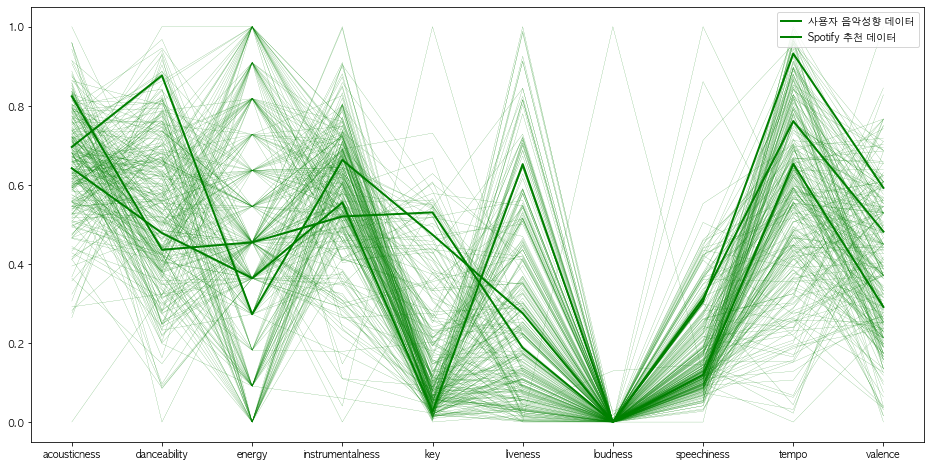

In [10]:
utils.visual_norm_data(sel_tracks, norm_features)

### KMeans

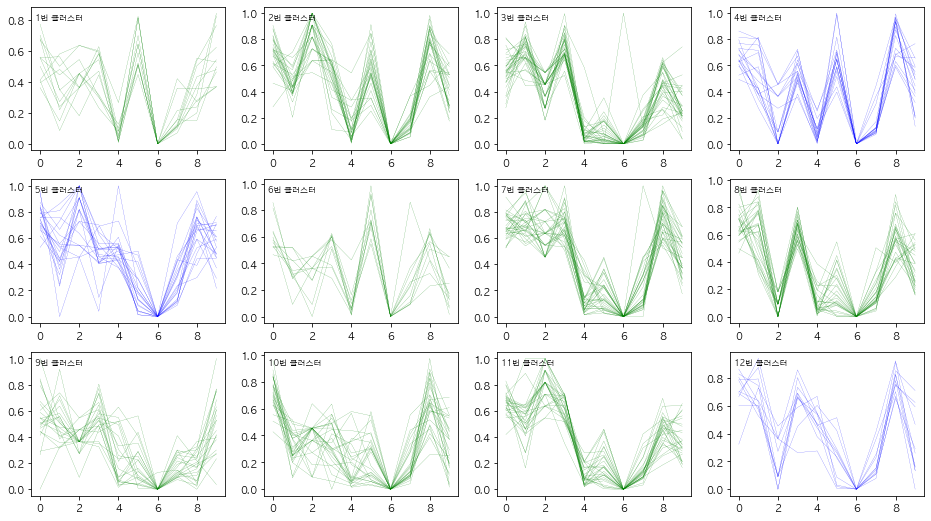

In [11]:
filter_music_list, kmeans = utils.reco_KMeans(norm_features, sel_tracks)

utils.visual_cluster_data(sel_tracks, kmeans)

In [12]:
_filtering_music_list = dp.music_filtering(sel_tracks, kmeans)

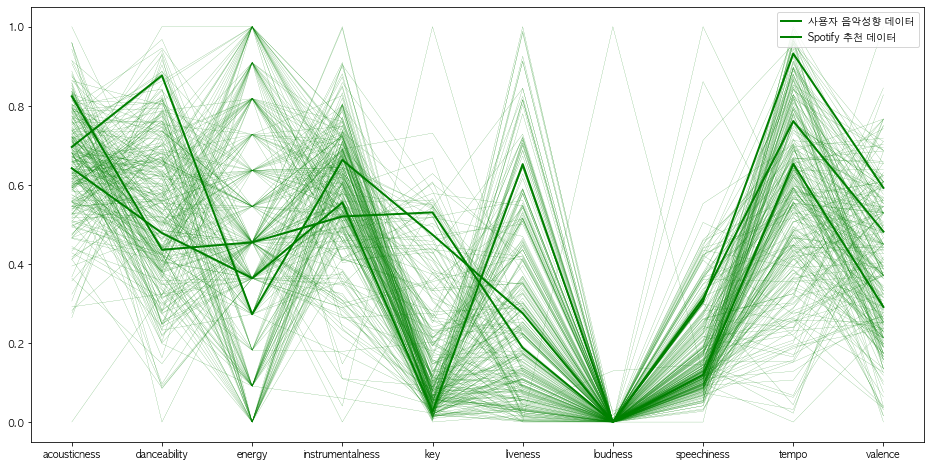

In [13]:
utils.visual_norm_data(sel_tracks, norm_features)

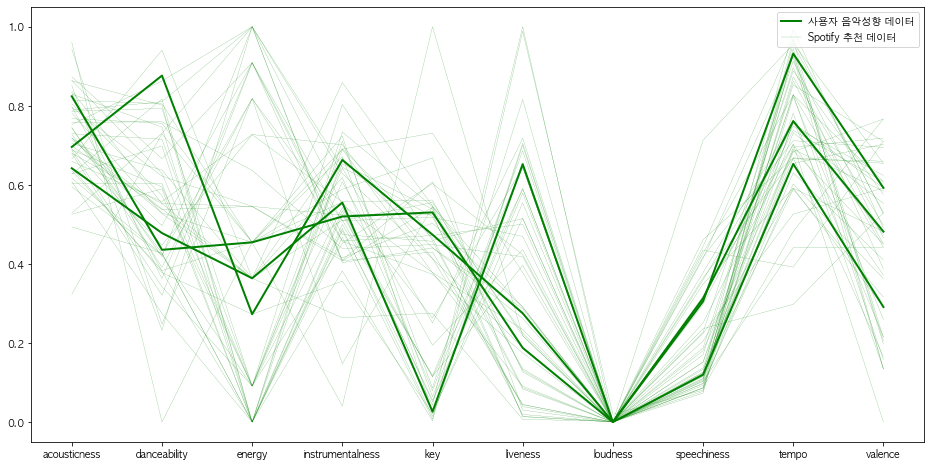

,id,name,artists,artists_name
1,3vZvHyE5Vpjqxyh0TPOO73,In My Mood,7cEaNXXTHx3LokbjUUyHal,BIG Naughty
4,4OGE9JDSqSGrfi7AF158uG,Shy (eh o),1MAUqH0haKBYbjpknTfreY,PENOMECO
5,1Fhb9iJPufNMZSwupsXiRe,beside you,3pc0bOVB5whxmD50W79wwO,keshi
13,794QVQtFNy7hvtjQP1keQd,1942 (feat. Yo Gotti & YBN Nahmir),02kJSzxNuaWGqwubyUba0Z,G-Eazy
19,4F1yvJfQ7gJkrcgFJQDjOr,Playinwitme (feat. Kehlani),4qBgvVog0wzW75IQ48mU7v,KYLE


In [14]:
filter_music = norm_features.set_index("id").loc[_filtering_music_list].reset_index()
reco_musics = [_ in _filtering_music_list for _ in recos['id']]

utils.visual_norm_data(sel_tracks, filter_music)
recos[reco_musics].head()

In [15]:
res = db.regist_mail(mail_box_id, recos[reco_musics])
mail_id = res.inserted_id
print("우체통({})에\n추천 플레이리스트 MuLetter({})가 등록되었습니다.".format(
    mail_box_id
    ,str(mail_id)))

우체통(6242ba072ec7c3e4d29f2c49)에
추천 플레이리스트 MuLetter(6242ba272ec7c3e4d29f2c4d)가 등록되었습니다.


In [16]:
genres

,artists,genres
0,2o8gT0fQmFxGNbowbdgeZe,"k-pop,hip-hop"
1,0siBQaURCli5wn2lqv8WZg,"k-pop,pop"


In [27]:
recos[reco_musics]

,id,name,artists,artists_name
1,3vZvHyE5Vpjqxyh0TPOO73,In My Mood,7cEaNXXTHx3LokbjUUyHal,BIG Naughty
4,4OGE9JDSqSGrfi7AF158uG,Shy (eh o),1MAUqH0haKBYbjpknTfreY,PENOMECO
5,1Fhb9iJPufNMZSwupsXiRe,beside you,3pc0bOVB5whxmD50W79wwO,keshi
13,794QVQtFNy7hvtjQP1keQd,1942 (feat. Yo Gotti & YBN Nahmir),02kJSzxNuaWGqwubyUba0Z,G-Eazy
19,4F1yvJfQ7gJkrcgFJQDjOr,Playinwitme (feat. Kehlani),4qBgvVog0wzW75IQ48mU7v,KYLE
21,5h40ovzXu7rF7Giwb9oXYy,Girls,03r4iKL2g2442PT9n2UKsx,Beastie Boys
22,1f5cbQtDrykjarZVrShaDI,Drowning (feat. Kodak Black),31W5EY0aAly4Qieq6OFu6I,A Boogie Wit da Hoodie
26,15LVXIWDmQA7mLUnLJn1AF,D-day (Feat. GIRIBOY),7lXgbtBDcCRbfc5f8FhGUL,Hoody
29,48ZUwXrEOhaXLCxvmRYhZv,Don't Sweat The Technique,6jHG1YQkqgojdEzerwvrVv,Eric B. & Rakim
33,3iL2l5gUqyPS6vDwJFgJTR,BedRock,5OrB6Jhhrl9y2PK0pSV4VP,Young Money


In [31]:
spotify.get_genres(token,recos[reco_musics]).head()

,artists,genres
0,7cEaNXXTHx3LokbjUUyHal,"k-pop,hip-hop"
1,1MAUqH0haKBYbjpknTfreY,"k-pop,pop,hip-hop"
2,3pc0bOVB5whxmD50W79wwO,"chill,pop"
3,02kJSzxNuaWGqwubyUba0Z,"pop,hip-hop,k-pop"
4,4qBgvVog0wzW75IQ48mU7v,"pop,hip-hop"
